# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import sys

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 5]
plt.style.use('ggplot')

In [4]:
import pmdarima as pm
import statsmodels.api as sm

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn import linear_model

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, max_error, r2_score

In [8]:
from xgboost import XGBRegressor

C:\Users\walla\anaconda3\envs\kogui_bunzl-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [10]:
import tensorflow as tf
tf.keras.utils.set_random_seed(2023)

In [11]:
from keras.layers import GRU

In [12]:
from keras.layers import LSTM

In [13]:
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D

In [14]:
from keras.utils.vis_utils import plot_model

# Load dataset

In [15]:
df = pd.read_csv('merged_wtr-level_alerts_precip_hum_temp_press_wind_with-NaN_v4.csv')

In [16]:
df.head()

,date,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
0,2000-01-01,461.0,0,503.0,0.0,502.0,0.0,NaN,29.840065,-2.6,89.0,11.52
1,2000-01-02,474.0,0,516.0,0.0,516.0,0.0,0.0,29.925702,-1.3,85.0,5.04
2,2000-01-03,478.0,0,520.0,0.0,520.0,0.0,0.0,29.946373,-1.1,83.0,5.04
3,2000-01-04,474.0,0,517.0,0.0,516.0,0.0,NaN,29.792817,-1.4,93.0,2.16
4,2000-01-05,464.0,0,513.0,0.0,508.0,0.0,NaN,29.783958,-0.9,95.0,5.76


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8401 non-null   object 
 1   belgrade_water_level_cm    8401 non-null   float64
 2   belgrade_flood_alert       8401 non-null   int64  
 3   pancevo_water_level_cm     8036 non-null   float64
 4   pancevo_flood_alert        8036 non-null   float64
 5   zemun_water_level_cm       8262 non-null   float64
 6   zemun_flood_alert          8262 non-null   float64
 7   belgrade_precipitation_mm  5885 non-null   float64
 8   belgrade_pressure_hg       8036 non-null   float64
 9   belgrade_temperature_c     7671 non-null   float64
 10  belgrade_humidity_pct      7671 non-null   float64
 11  belgrade_windspeed_kph     7670 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 787.7+ KB


In [18]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8401 non-null   datetime64[ns]
 1   belgrade_water_level_cm    8401 non-null   float64       
 2   belgrade_flood_alert       8401 non-null   int64         
 3   pancevo_water_level_cm     8036 non-null   float64       
 4   pancevo_flood_alert        8036 non-null   float64       
 5   zemun_water_level_cm       8262 non-null   float64       
 6   zemun_flood_alert          8262 non-null   float64       
 7   belgrade_precipitation_mm  5885 non-null   float64       
 8   belgrade_pressure_hg       8036 non-null   float64       
 9   belgrade_temperature_c     7671 non-null   float64       
 10  belgrade_humidity_pct      7671 non-null   float64       
 11  belgrade_windspeed_kph     7670 non-null   float64       
dtypes: dat

# Plot data

In [19]:
df = df.set_index('date')
df.head()

,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
date,,,,,,,,,,,
2000-01-01,461.0,0,503.0,0.0,502.0,0.0,NaN,29.840065,-2.6,89.0,11.52
2000-01-02,474.0,0,516.0,0.0,516.0,0.0,0.0,29.925702,-1.3,85.0,5.04
2000-01-03,478.0,0,520.0,0.0,520.0,0.0,0.0,29.946373,-1.1,83.0,5.04
2000-01-04,474.0,0,517.0,0.0,516.0,0.0,NaN,29.792817,-1.4,93.0,2.16
2000-01-05,464.0,0,513.0,0.0,508.0,0.0,NaN,29.783958,-0.9,95.0,5.76


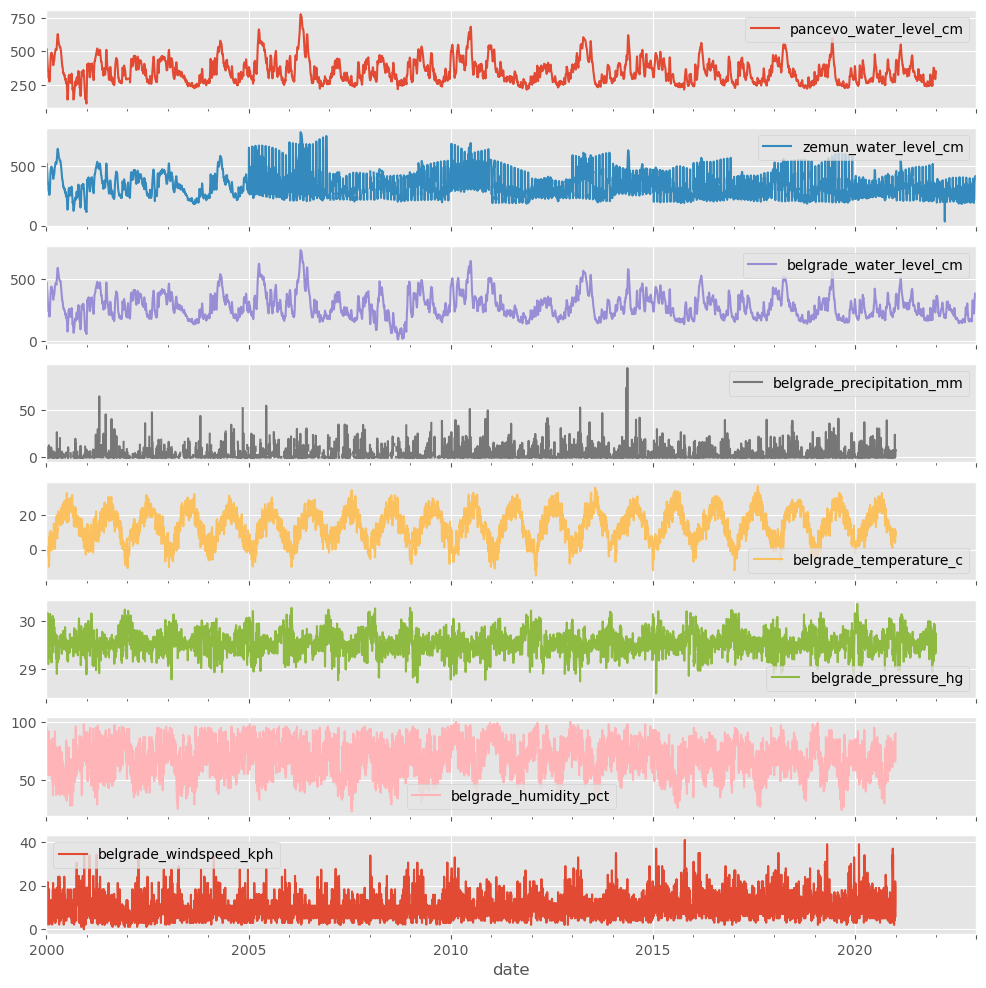

In [20]:
plt.rcParams["figure.figsize"] = [12, 12]
df_plot = df[['pancevo_water_level_cm','zemun_water_level_cm','belgrade_water_level_cm','belgrade_precipitation_mm','belgrade_temperature_c','belgrade_pressure_hg','belgrade_humidity_pct', 'belgrade_windspeed_kph']].plot(subplots=True,grid=True)

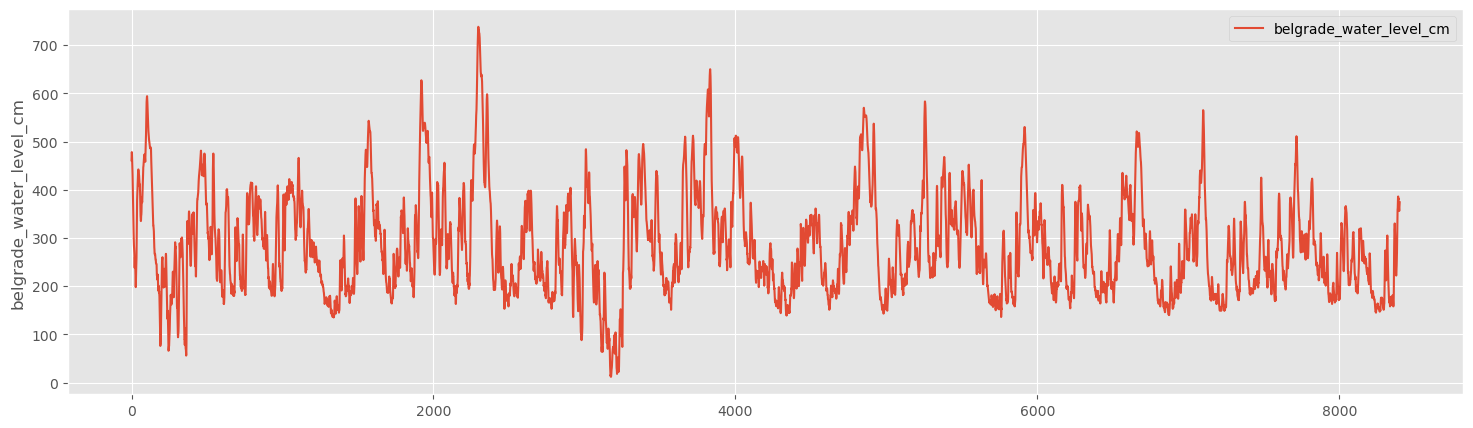

In [203]:
df_plot = df[['belgrade_water_level_cm']].plot(grid=True)
plt.ylabel('belgrade_water_level_cm')
file_name = 'belgrade_water_level_cm.png'  
plt.savefig(file_name)

# Preprocessing data

## Filtering data from 2000-2020

In [21]:
df = df.reset_index()
df.head()

,date,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
0,2000-01-01,461.0,0,503.0,0.0,502.0,0.0,NaN,29.840065,-2.6,89.0,11.52
1,2000-01-02,474.0,0,516.0,0.0,516.0,0.0,0.0,29.925702,-1.3,85.0,5.04
2,2000-01-03,478.0,0,520.0,0.0,520.0,0.0,0.0,29.946373,-1.1,83.0,5.04
3,2000-01-04,474.0,0,517.0,0.0,516.0,0.0,NaN,29.792817,-1.4,93.0,2.16
4,2000-01-05,464.0,0,513.0,0.0,508.0,0.0,NaN,29.783958,-0.9,95.0,5.76


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8401 non-null   datetime64[ns]
 1   belgrade_water_level_cm    8401 non-null   float64       
 2   belgrade_flood_alert       8401 non-null   int64         
 3   pancevo_water_level_cm     8036 non-null   float64       
 4   pancevo_flood_alert        8036 non-null   float64       
 5   zemun_water_level_cm       8262 non-null   float64       
 6   zemun_flood_alert          8262 non-null   float64       
 7   belgrade_precipitation_mm  5885 non-null   float64       
 8   belgrade_pressure_hg       8036 non-null   float64       
 9   belgrade_temperature_c     7671 non-null   float64       
 10  belgrade_humidity_pct      7671 non-null   float64       
 11  belgrade_windspeed_kph     7670 non-null   float64       
dtypes: dat

In [23]:
df_2020 = df[df['date'] < pd.to_datetime('2021-01-01', format='%Y-%m-%d')].copy()
df_2020['date'].max()

Timestamp('2020-12-31 00:00:00')

In [24]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 7670
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       7671 non-null   datetime64[ns]
 1   belgrade_water_level_cm    7671 non-null   float64       
 2   belgrade_flood_alert       7671 non-null   int64         
 3   pancevo_water_level_cm     7671 non-null   float64       
 4   pancevo_flood_alert        7671 non-null   float64       
 5   zemun_water_level_cm       7532 non-null   float64       
 6   zemun_flood_alert          7532 non-null   float64       
 7   belgrade_precipitation_mm  5885 non-null   float64       
 8   belgrade_pressure_hg       7671 non-null   float64       
 9   belgrade_temperature_c     7671 non-null   float64       
 10  belgrade_humidity_pct      7671 non-null   float64       
 11  belgrade_windspeed_kph     7670 non-null   float64       
dtypes: dat

## Cleaning data and filling NAs

In [25]:
df_2020.columns

Index(['date', 'belgrade_water_level_cm', 'belgrade_flood_alert',
       'pancevo_water_level_cm', 'pancevo_flood_alert', 'zemun_water_level_cm',
       'zemun_flood_alert', 'belgrade_precipitation_mm',
       'belgrade_pressure_hg', 'belgrade_temperature_c',
       'belgrade_humidity_pct', 'belgrade_windspeed_kph'],
      dtype='object')

The dependendent variable will be **belgrade_water_level_cm**. Removing non needed water levels and flood alerts.

In [26]:
df_2020_clean = df_2020.drop(columns=['pancevo_water_level_cm', 'belgrade_flood_alert', 'pancevo_flood_alert', 'zemun_water_level_cm',
       'zemun_flood_alert']).copy()

In [27]:
df_2020_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 7670
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       7671 non-null   datetime64[ns]
 1   belgrade_water_level_cm    7671 non-null   float64       
 2   belgrade_precipitation_mm  5885 non-null   float64       
 3   belgrade_pressure_hg       7671 non-null   float64       
 4   belgrade_temperature_c     7671 non-null   float64       
 5   belgrade_humidity_pct      7671 non-null   float64       
 6   belgrade_windspeed_kph     7670 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 479.4 KB


### Precipitation missing values
NaN values for daily precipitation will be assumed as zero

In [28]:
df_2020_clean['belgrade_precipitation_mm'] = df_2020_clean['belgrade_precipitation_mm'].fillna(0)
df_2020_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 7670
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       7671 non-null   datetime64[ns]
 1   belgrade_water_level_cm    7671 non-null   float64       
 2   belgrade_precipitation_mm  7671 non-null   float64       
 3   belgrade_pressure_hg       7671 non-null   float64       
 4   belgrade_temperature_c     7671 non-null   float64       
 5   belgrade_humidity_pct      7671 non-null   float64       
 6   belgrade_windspeed_kph     7670 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 479.4 KB


### Windspeed  missing values
There is only one NaN for wind speed. The missing value will be replaced with the value of the previous day.

In [29]:
df_2020_clean['belgrade_windspeed_kph'] = df_2020_clean['belgrade_windspeed_kph'].fillna(method="ffill")
df_2020_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 7670
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       7671 non-null   datetime64[ns]
 1   belgrade_water_level_cm    7671 non-null   float64       
 2   belgrade_precipitation_mm  7671 non-null   float64       
 3   belgrade_pressure_hg       7671 non-null   float64       
 4   belgrade_temperature_c     7671 non-null   float64       
 5   belgrade_humidity_pct      7671 non-null   float64       
 6   belgrade_windspeed_kph     7671 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 479.4 KB


In [30]:
df_2020_clean.isna().any()

date                         False
belgrade_water_level_cm      False
belgrade_precipitation_mm    False
belgrade_pressure_hg         False
belgrade_temperature_c       False
belgrade_humidity_pct        False
belgrade_windspeed_kph       False
dtype: bool

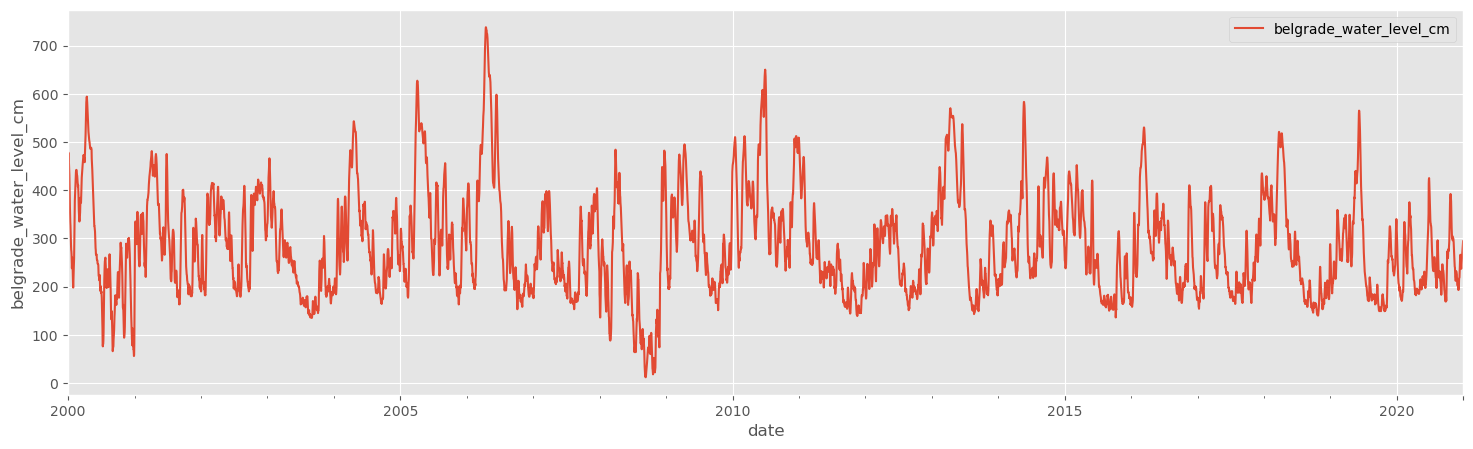

In [206]:
df_plot = df_2020_clean.plot(grid=True,x='date', y='belgrade_water_level_cm')
plt.ylabel('belgrade_water_level_cm')
file_name = 'belgrade_water_level_cm.png'  
plt.savefig(file_name)

# Correlations 

In [31]:
df_2020_clean.columns

Index(['date', 'belgrade_water_level_cm', 'belgrade_precipitation_mm',
       'belgrade_pressure_hg', 'belgrade_temperature_c',
       'belgrade_humidity_pct', 'belgrade_windspeed_kph'],
      dtype='object')

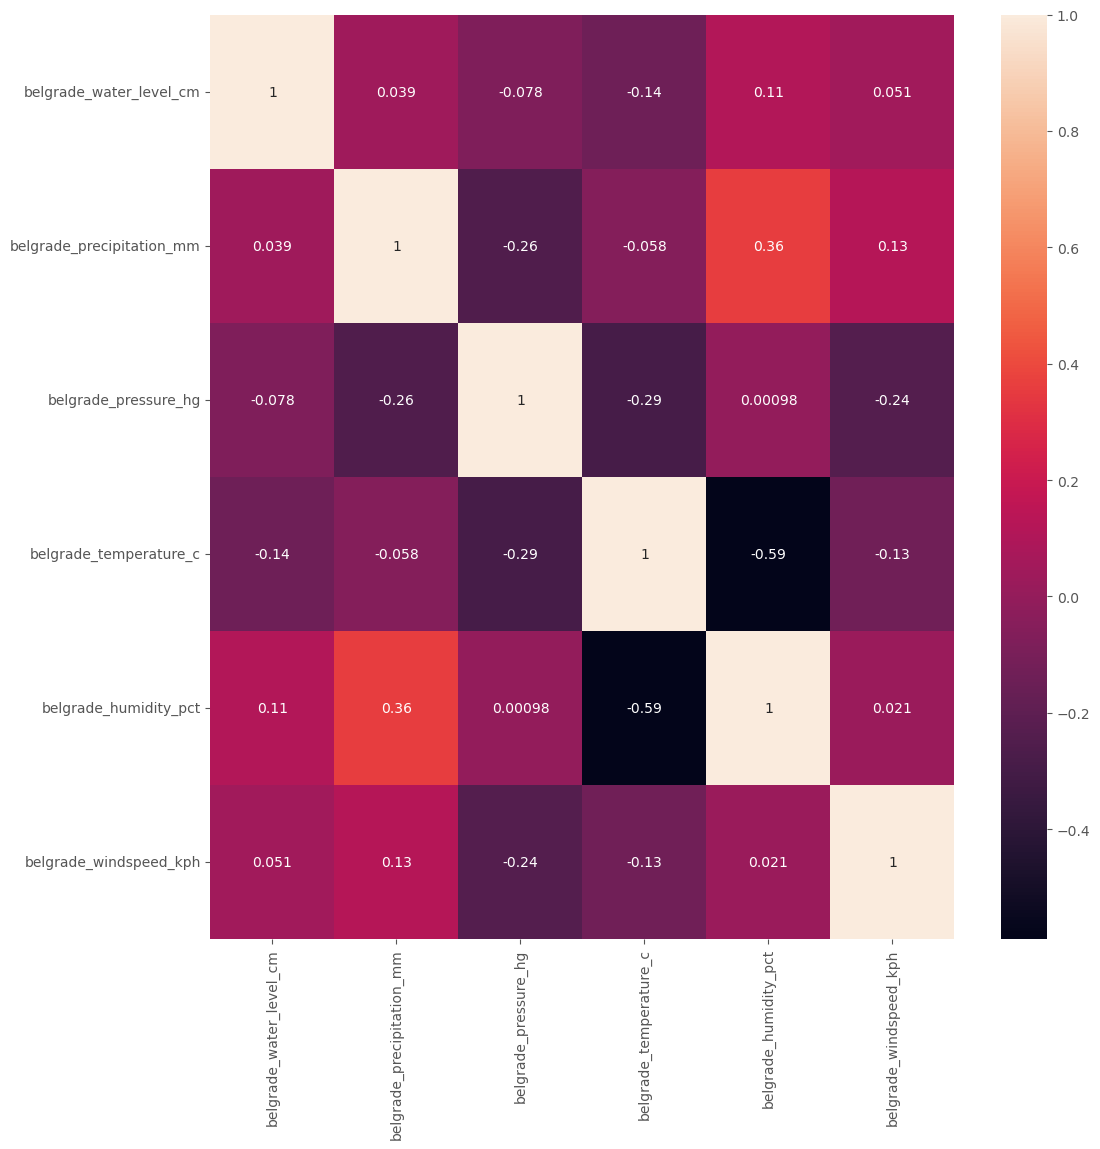

In [32]:
corr_matrix = df_2020_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Auxiliary functions to process model results

In [33]:
def model_error_metrics(y_test,y_pred):
    R2 = r2_score(y_test, y_pred)
    ME = max_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)    
    return R2, ME, MAE, MAPE

def print_model_results(model_name,y_test,y_pred):
    R2, ME, MAE, MAPE = model_error_metrics(y_test,y_pred)
    print(f'{model_name}:  R^2= {R2:.4f},  ME = {ME:.4f},  MAE = {MAE:.4f},  MAPE = {MAPE:.4f}') 
    return None

def plot_results(model_name,y_test,y_pred):
    R2, ME, MAE, MAPE = model_error_metrics(y_test,y_pred)
    df_plot = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
    df_plot = df_plot.reset_index()
    df_plot = df_plot.drop(columns=['index'])
    date = pd.date_range(start='2020-01-01', end='2020-12-31')
    df_plot = df_plot.set_index(date)
    df_plot.plot()
    plt.ylabel('belgrade_water_level_cm')
    plt.title(f' {model_name}:  R^2= {R2:.4f},  ME = {ME:.4f},  MAE = {MAE:.4f},  MAPE = {MAPE:.4f}') 
    plt.ylim(150,500)

    file_name =  f'{model_name:}.png'  
    plt.savefig(file_name)
    return None

def plot_result_error(model_name,y_test,y_pred):
    df_plot = pd.DataFrame({'abs_error':abs(y_test-y_pred)})
    df_plot = df_plot.reset_index()
    df_plot = df_plot.drop(columns=['index'])
    date = pd.date_range(start='2020-01-01', end='2020-12-31')
    df_plot = df_plot.set_index(date)
    df_plot.plot() 
    plt.ylabel('error [cm]')
    R2, ME, MAE, MAPE = model_error_metrics(y_test,y_pred)
    plt.title(f' {model_name}:  R^2= {R2:.4f},  ME = {ME:.4f},  MAE = {MAE:.4f},  MAPE = {MAPE:.4f}') 
    plt.ylim(0,65)
    
    model_name_error = model_name + '_error'
    file_name =  f'{model_name_error}.png'  
    plt.savefig(file_name)
    return None

def plot_result_error_hist(model_name,y_test,y_pred):
    df_plot = pd.DataFrame({'error':y_test-y_pred})
    df_plot = df_plot.reset_index()
    df_plot = df_plot.drop(columns=['index'])
    df_plot.plot.hist() 
    R2, ME, MAE, MAPE = model_error_metrics(y_test,y_pred)
    plt.title(f' {model_name}:  R^2= {R2:.4f},  ME = {ME:.4f},  MAE = {MAE:.4f},  MAPE = {MAPE:.4f}') 
    
    model_name_error = model_name + '_error_hist'
    file_name =  f'{model_name_error}.png'  
    plt.savefig(file_name)
    return None

## Function to create lags with history (one step window)

In [34]:
def lagX(X,lag):
    Xlag = []
    for i in range(lag,X.shape[0]):
        Xlag.append(list(X.loc[i-lag:i-1]))
    Xlag = np.array(Xlag)
    return Xlag    

### X and y matrices for autoregressive prediction (AR) (only y variable to predict itself)

In [35]:
lag = 7

In [36]:
y = df_2020_clean['belgrade_water_level_cm']
y_lag = y[lag:].copy()
y_lag.shape

(7664,)

In [37]:
Xar_lag = lagX(df_2020_clean['belgrade_water_level_cm'],lag)
Xar_lag.shape

(7664, 7)

# ML and DL Time Series Forecasting Models

## Splitting training and test variables
The last year of data will be used as test and the remaining as training

In [38]:
y_train = y_lag[:-366]
y_train.shape

C:\Users\walla\AppData\Local\Temp\ipykernel_122476\934257334.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_lag[:-366]


(7298,)

In [39]:
y_test = y_lag[-366:]
y_test.shape

C:\Users\walla\AppData\Local\Temp\ipykernel_122476\755150256.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y_lag[-366:]


(366,)

In [40]:
Xar_train = Xar_lag[:-366]
Xar_train.shape

(7298, 7)

In [41]:
Xar_test = Xar_lag[-366:]
Xar_test.shape

(366, 7)

## Scaling variables

In [42]:
scaler_s = MinMaxScaler(feature_range=(0, 1))
Xar_train_s = scaler_s.fit_transform(Xar_train)
Xar_test_s = scaler_s.fit_transform(Xar_test)
y_train_s = scaler_s.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_s = scaler_s.fit_transform(np.array(y_test).reshape(-1, 1))

## Linear Regression - Only AR (autoregressive) model with y variable

In [172]:
model_name = 'Linear Regression AR'
regr_AR = linear_model.LinearRegression()
regr_AR.fit(Xar_train, y_train)
y_pred = regr_AR.predict(Xar_test)
print_model_results(model_name,y_test,y_pred)

Linear Regression AR:  R^2= 0.9867,  ME = 51.0956,  MAE = 4.4193,  MAPE = 0.0181


In [173]:
regr_AR_error = y_test - y_pred
regr_AR_metrics = list(model_error_metrics(y_test,y_pred))
regr_AR_metrics

[0.9866570735128072,
 51.09557845733451,
 4.419300745447664,
 0.018084063114481227]

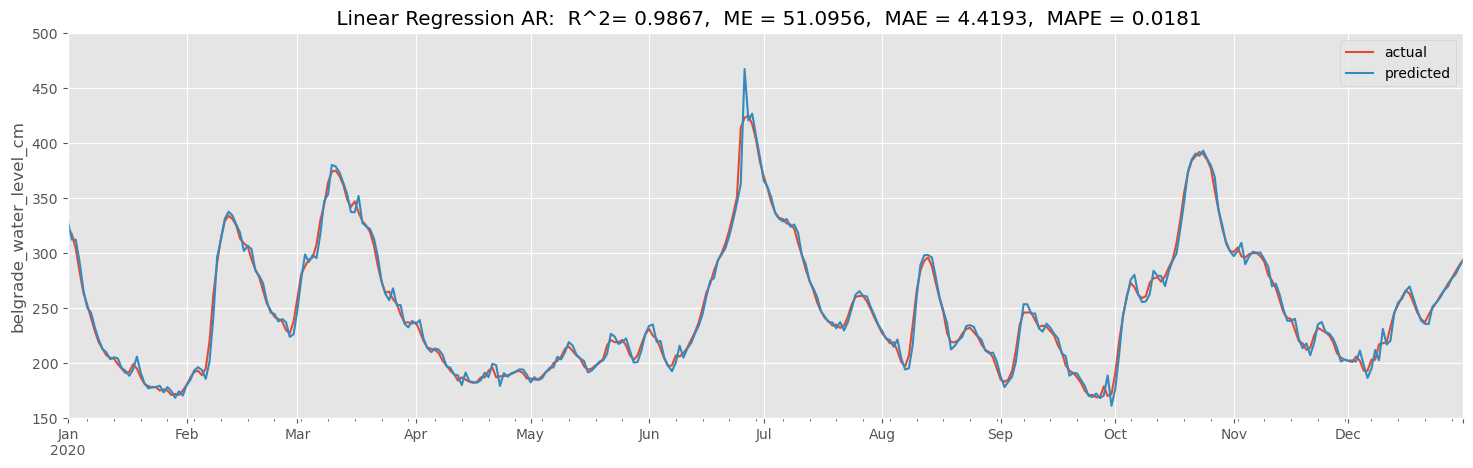

In [99]:
plt.rcParams["figure.figsize"] = [18, 5]
plot_results(model_name,y_test,y_pred)

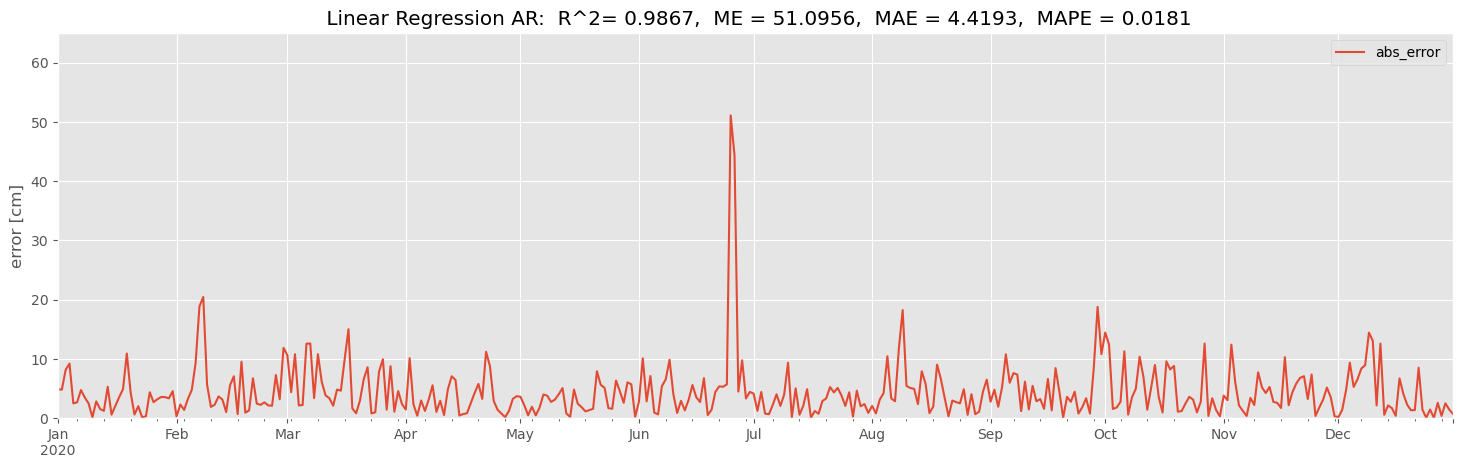

In [100]:
plot_result_error(model_name,y_test,y_pred)

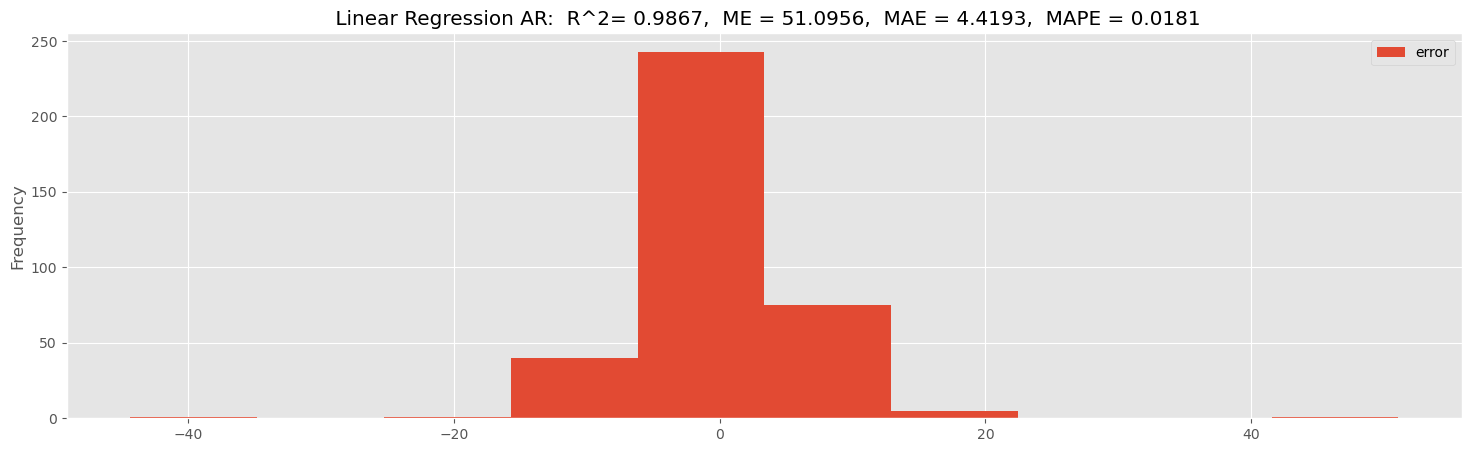

In [101]:
plot_result_error_hist(model_name,y_test,y_pred)

## XGBoost Regression - Only AR (autoregressive) model with y variable

In [174]:
model_name = 'XGBoost AR'
regr_XGB_AR = XGBRegressor()
regr_XGB_AR.fit(Xar_train, y_train)
y_pred = regr_XGB_AR.predict(Xar_test)
print_model_results(model_name,y_test,y_pred)

XGBoost AR:  R^2= 0.9846,  ME = 56.2015,  MAE = 5.0071,  MAPE = 0.0203


In [175]:
regr_XGB_AR_error = y_test - y_pred
regr_XGB_AR_metrics = list(model_error_metrics(y_test,y_pred))
regr_XGB_AR_metrics

[0.9845875954474503, 56.20147705078125, 5.007058607424543, 0.02032851907858765]

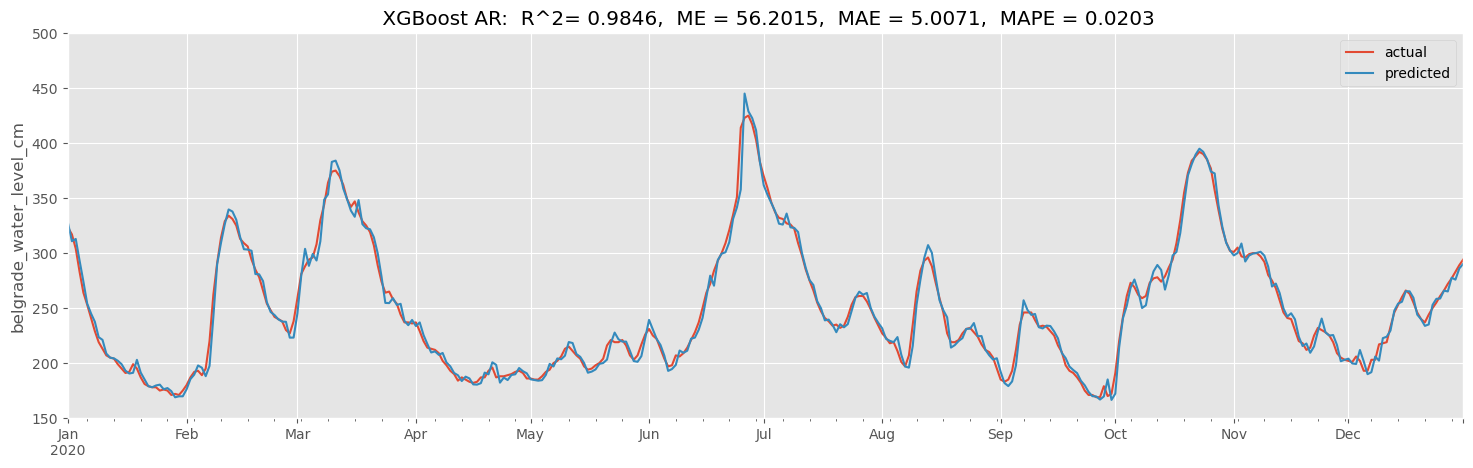

In [104]:
plot_results(model_name,y_test,y_pred)

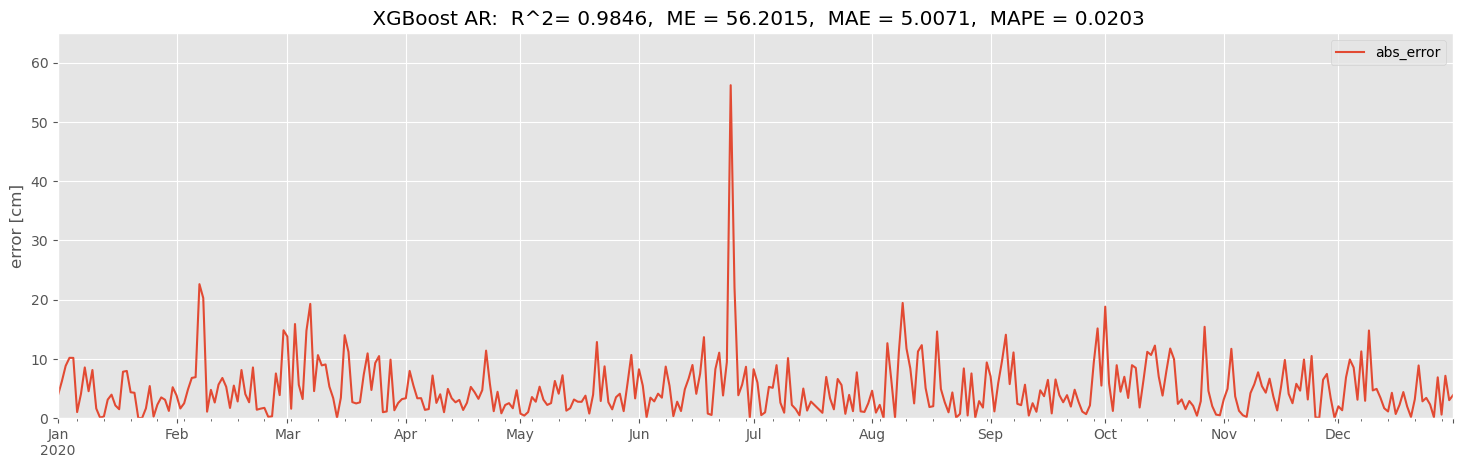

In [105]:
plot_result_error(model_name,y_test,y_pred)

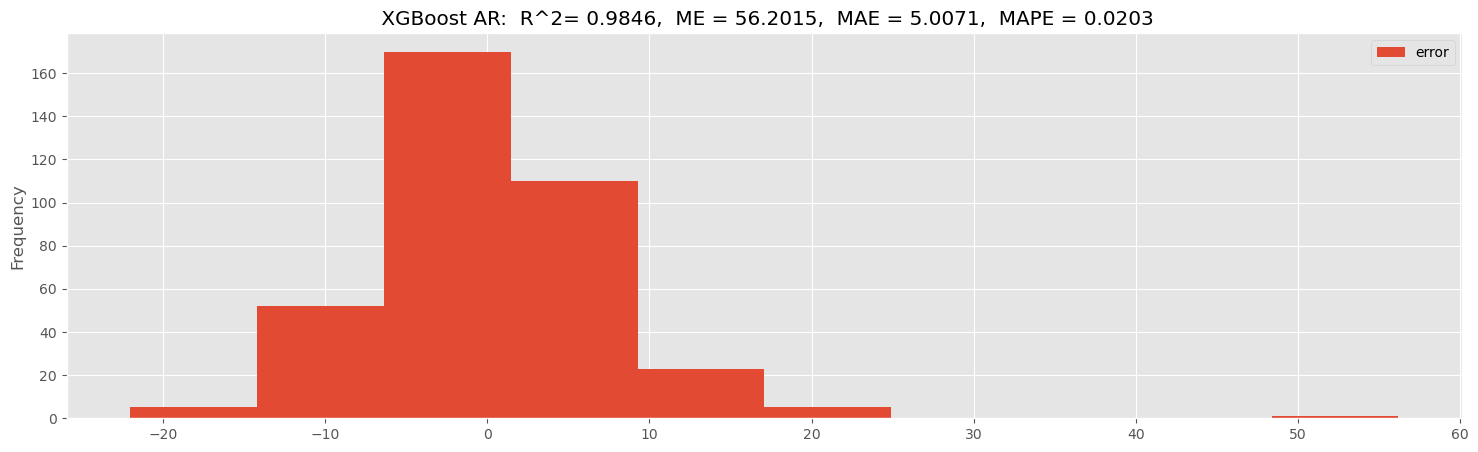

In [106]:
plot_result_error_hist(model_name,y_test,y_pred)

## MLP Regression - Only AR (autoregressive) model with y variable

In [146]:
input_layer = Input(shape=(7,), dtype='float32')
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense3)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [147]:
mlp = Model(inputs=input_layer, outputs=output_layer)
mlp.compile(loss='mean_squared_error', optimizer='adam')
mlp.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_14 (Dense)            (None, 32)                256       
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable p

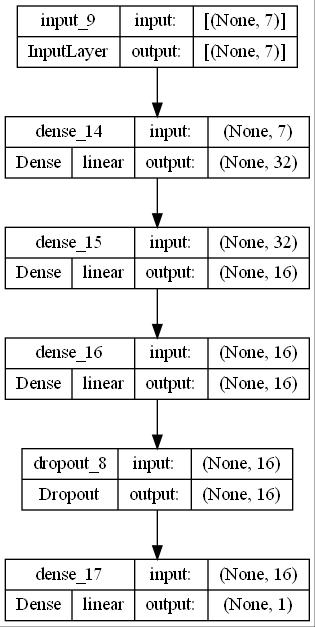

In [210]:
dot_img_file = model_name + '_DL_model.jpg'
tf.keras.utils.plot_model(mlp, to_file=dot_img_file, show_shapes=True,show_layer_activations=True,)

In [55]:
save_weights_at = os.path.join('keras_models', 'Belgrade_WaterLevel_MLP_weights_AR.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
mlp.fit(x=Xar_train_s, y=y_train_s, batch_size=16, epochs=25,
             verbose=1, callbacks=[save_best], validation_data=(Xar_test_s, y_test_s),
             shuffle=True)

Epoch 1/25
457/457 [==============================] - 3s 2ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 2/25
457/457 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 3/25
457/457 [==============================] - 1s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/25
457/457 [==============================] - 1s 1ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/25
457/457 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/25
457/457 [==============================] - 1s 1ms/step - loss: 7.6861e-04 - val_loss: 0.0017
Epoch 7/25
457/457 [==============================] - 1s 1ms/step - loss: 7.0042e-04 - val_loss: 0.0011
Epoch 8/25
457/457 [==============================] - 1s 1ms/step - loss: 6.0045e-04 - val_loss: 9.3012e-04
Epoch 9/25
457/457 [==============================] - 1s 1ms/step - loss: 6.1086e-04 - val_loss: 0.0011
Epoch 10/25
457/457 [==============================] - 1s 1ms/step - loss: 5.817

In [207]:
best_model = load_model(os.path.join('keras_models', 'Belgrade_WaterLevel_MLP_weights_AR.20-0.0007.hdf5'))
y_pred_s = best_model.predict(Xar_test_s)

12/12 [==============================] - 0s 3ms/step


In [208]:
y_pred = scaler_s.inverse_transform(y_pred_s)
y_pred = y_pred.reshape(-1)

In [209]:
model_name = 'MLP Regression AR'
print_model_results(model_name,y_test,y_pred)

MLP Regression AR:  R^2= 0.9863,  ME = 54.5163,  MAE = 4.5347,  MAPE = 0.0186


In [179]:
mlp_AR_error  = y_test - y_pred
mlp_AR_metrics = list(model_error_metrics(y_test,y_pred))
mlp_AR_metrics

[0.9862943939634007, 54.51629638671875, 4.534690481717469, 0.01860860796742514]

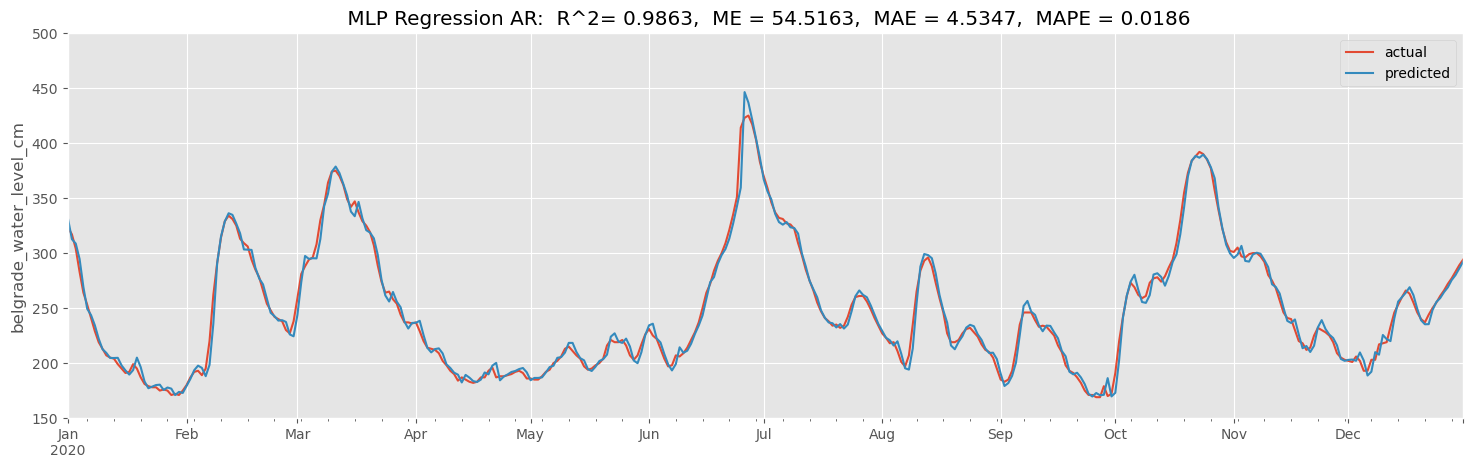

In [113]:
plot_results(model_name,y_test,y_pred)

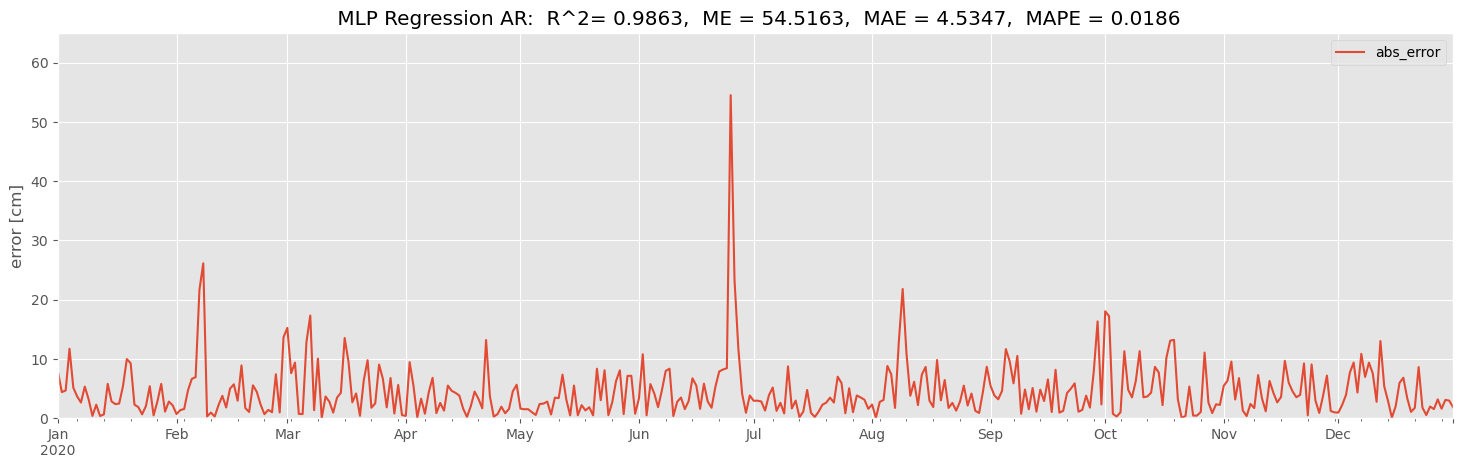

In [114]:
plot_result_error(model_name,y_test,y_pred)

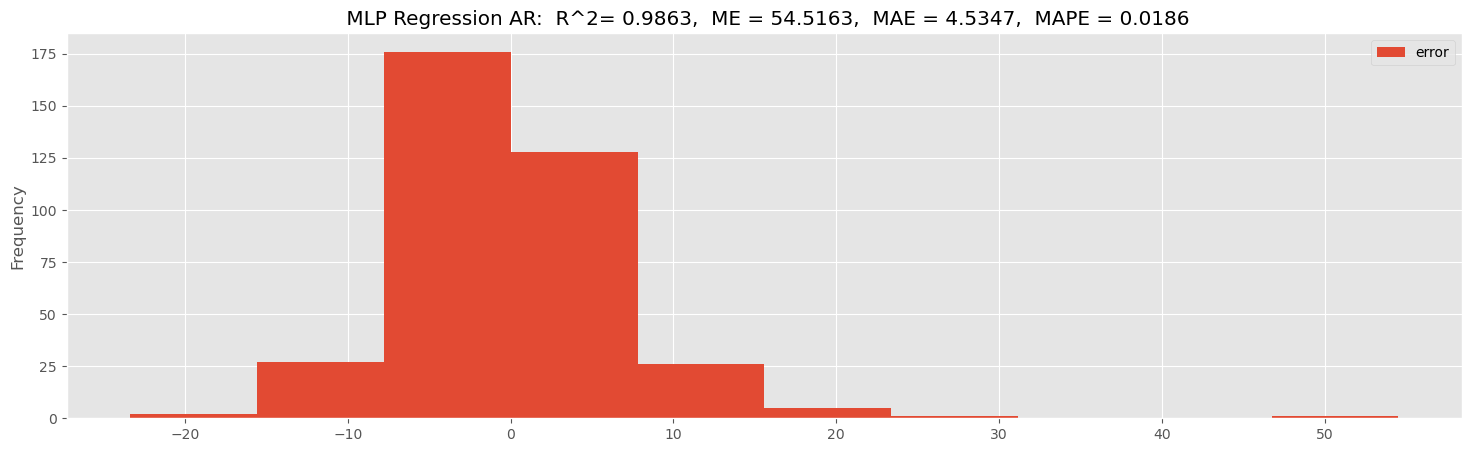

In [115]:
plot_result_error_hist(model_name,y_test,y_pred)

## GRU Regression - Only AR (autoregressive) model with y variable

In [152]:
input_layer = Input(shape=(7,1), dtype='float32')
gru_layer1 = GRU(64, input_shape=(7,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(7,64), return_sequences=False)(gru_layer1)
dropout_layer = Dropout(0.2)(gru_layer2)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [153]:
gru = Model(inputs=input_layer, outputs=output_layer)
gru.compile(loss='mean_squared_error', optimizer='adam')
gru.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 7, 1)]            0         
                                                                 
 gru_4 (GRU)                 (None, 7, 64)             12864     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


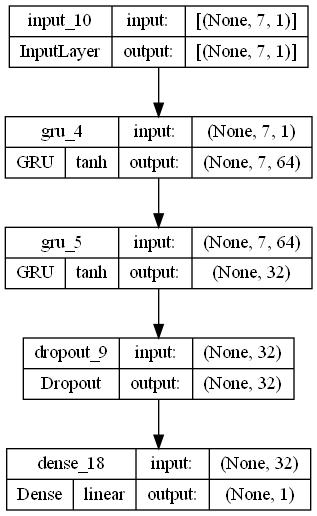

In [212]:
dot_img_file = model_name + '_DL_model.jpg'
tf.keras.utils.plot_model(gru, to_file=dot_img_file, show_shapes=True,show_layer_activations=True,)

In [63]:
save_weights_at = os.path.join('keras_models', 'Belgrade_WaterLevel_GRU_weights_AR.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
gru.fit(x=Xar_train_s, y=y_train_s, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(Xar_test_s, y_test_s),
             shuffle=True)

Epoch 1/20
457/457 [==============================] - 9s 11ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 2/20
457/457 [==============================] - 6s 13ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 3/20
457/457 [==============================] - 4s 9ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 4/20
457/457 [==============================] - 4s 9ms/step - loss: 8.3138e-04 - val_loss: 0.0012
Epoch 5/20
457/457 [==============================] - 4s 9ms/step - loss: 6.5317e-04 - val_loss: 9.8972e-04
Epoch 6/20
457/457 [==============================] - 4s 9ms/step - loss: 5.5349e-04 - val_loss: 0.0012
Epoch 7/20
457/457 [==============================] - 4s 9ms/step - loss: 4.1382e-04 - val_loss: 8.5474e-04
Epoch 8/20
457/457 [==============================] - 4s 9ms/step - loss: 3.9558e-04 - val_loss: 9.2754e-04
Epoch 9/20
457/457 [==============================] - 4s 10ms/step - loss: 3.5823e-04 - val_loss: 8.7881e-04
Epoch 10/20
457/457 [==============================] - 4s

In [191]:
best_model = load_model(os.path.join('keras_models', 'Belgrade_WaterLevel_GRU_weights_AR.10-0.0008.hdf5'))
y_pred_s = best_model.predict(Xar_test_s)

12/12 [==============================] - 1s 6ms/step


In [211]:
y_pred = scaler_s.inverse_transform(y_pred_s)
y_pred = y_pred.reshape(-1)
model_name = 'GRU AR'
print_model_results(model_name,y_test,y_pred)

GRU AR:  R^2= 0.9863,  ME = 54.5163,  MAE = 4.5347,  MAPE = 0.0186


In [193]:
gru_AR_error  = y_test - y_pred
gru_AR_metrics = list(model_error_metrics(y_test,y_pred))
gru_AR_metrics

[0.9831041164326719, 62.116912841796875, 4.589510057793289, 0.0184449162822051]

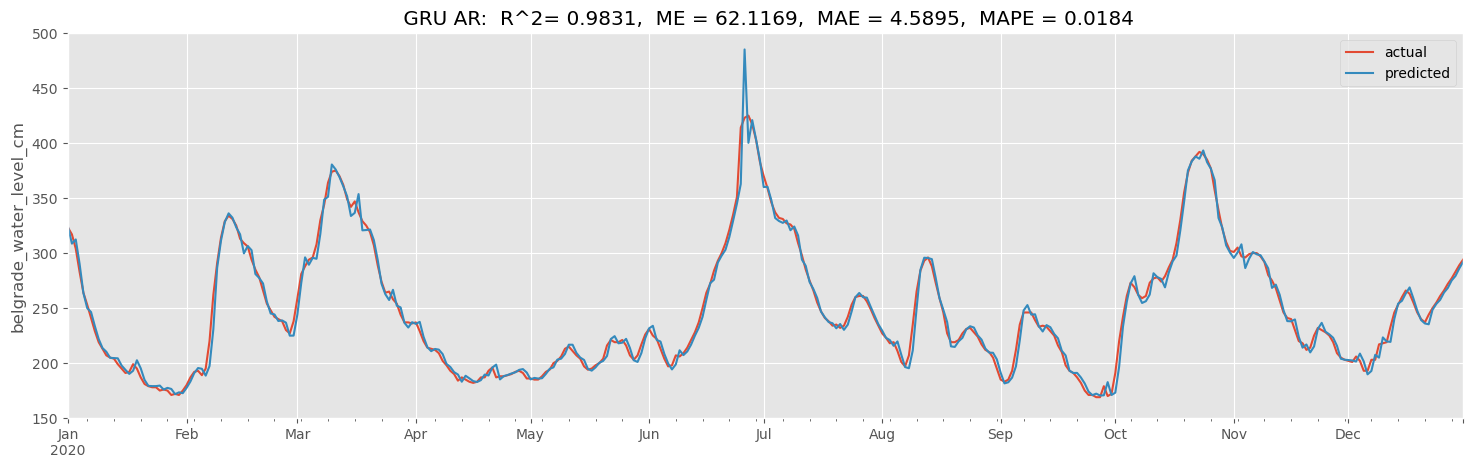

In [121]:
plot_results(model_name,y_test,y_pred)

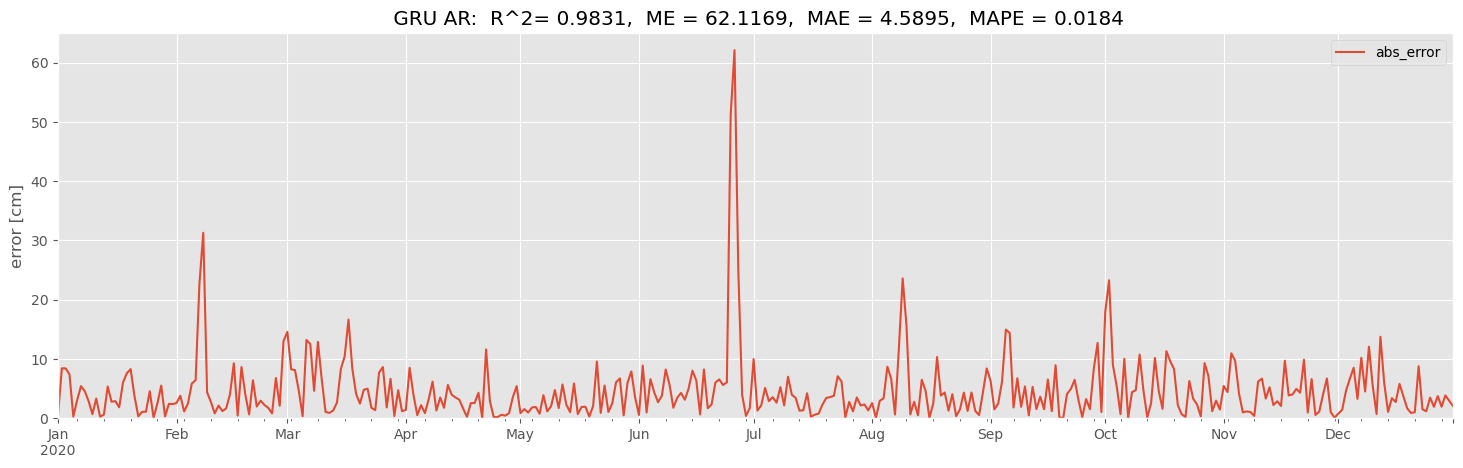

In [122]:
plot_result_error(model_name,y_test,y_pred)

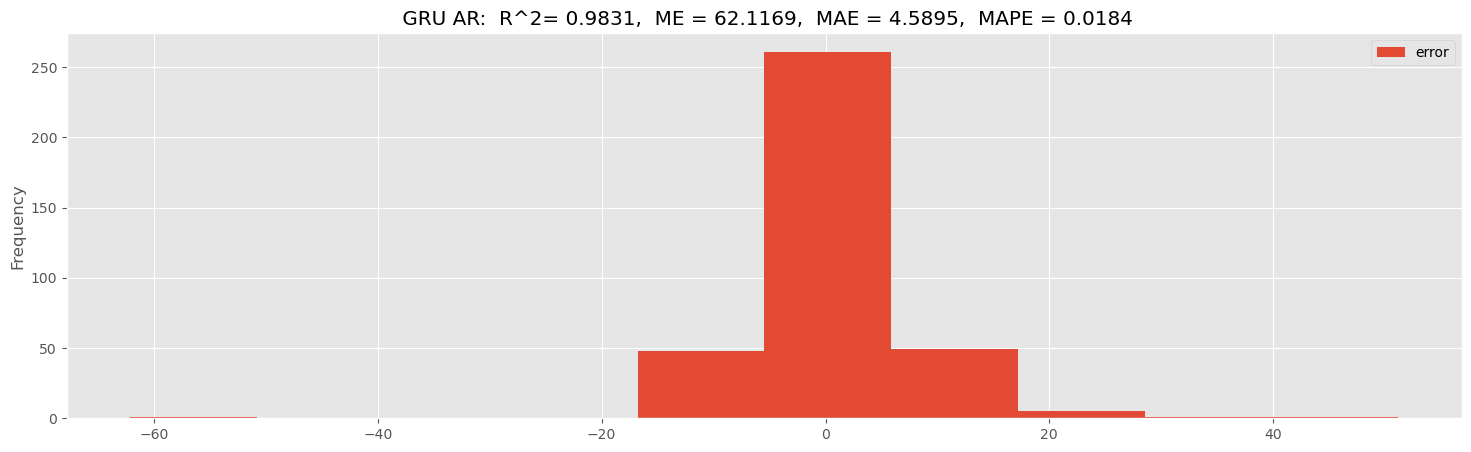

In [123]:
plot_result_error_hist(model_name,y_test,y_pred)

## LSTM - Only AR (autoregressive) model with y variable

In [157]:
input_layer = Input(shape=(7,1), dtype='float32')
lstm_layer = LSTM(64, input_shape=(7,1), return_sequences=False)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [158]:
lstm = Model(inputs=input_layer, outputs=output_layer)
lstm.compile(loss='mae', optimizer='adam')
lstm.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7, 1)]            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


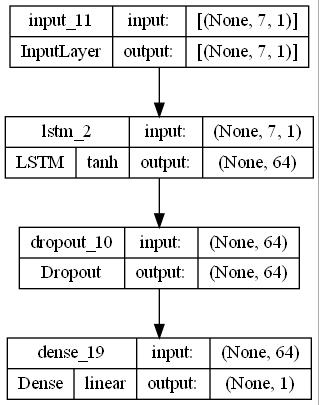

In [214]:
dot_img_file = model_name + '_DL_model.jpg'
tf.keras.utils.plot_model(lstm, to_file=dot_img_file, show_shapes=True,show_layer_activations=True,)

In [82]:
save_weights_at = os.path.join('keras_models', 'Belgrade_WaterLevel_LSTM_weights_AR.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
lstm.fit(x=Xar_train_s, y=y_train_s, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(Xar_test_s, y_test_s),
             shuffle=True)

Epoch 1/20
457/457 [==============================] - 5s 6ms/step - loss: 0.0428 - val_loss: 0.0560
Epoch 2/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0284 - val_loss: 0.0447
Epoch 3/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0244 - val_loss: 0.0425
Epoch 4/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0215 - val_loss: 0.0380
Epoch 5/20
457/457 [==============================] - 3s 6ms/step - loss: 0.0193 - val_loss: 0.0319
Epoch 6/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0179 - val_loss: 0.0278
Epoch 7/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0167 - val_loss: 0.0265
Epoch 8/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0150 - val_loss: 0.0264
Epoch 9/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0139 - val_loss: 0.0255
Epoch 10/20
457/457 [==============================] - 2s 5ms/step - loss: 0.0136 - val_loss: 0.0222

In [183]:
best_model = load_model(os.path.join('keras_models', 'Belgrade_WaterLevel_LSTM_weights_AR.20-0.0176.hdf5'))
y_pred_s = best_model.predict(Xar_test_s)

12/12 [==============================] - 0s 3ms/step


In [213]:
y_pred = scaler_s.inverse_transform(y_pred_s)
y_pred = y_pred.reshape(-1)
model_name = 'LSTM AR'
print_model_results(model_name,y_test,y_pred)

LSTM AR:  R^2= 0.9863,  ME = 54.5163,  MAE = 4.5347,  MAPE = 0.0186


In [185]:
lstm_AR_error  = y_test - y_pred
lstm_AR_metrics = list(model_error_metrics(y_test,y_pred))
lstm_AR_metrics

[0.9851016812495756, 53.3428955078125, 4.514589361805734, 0.018262149877416034]

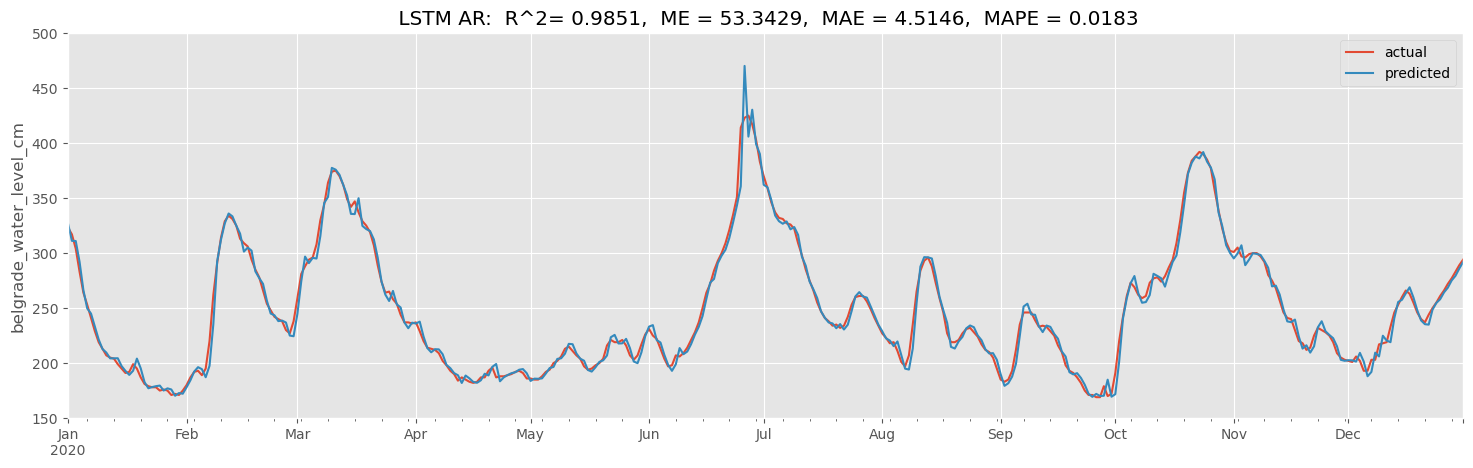

In [129]:
plot_results(model_name,y_test,y_pred)

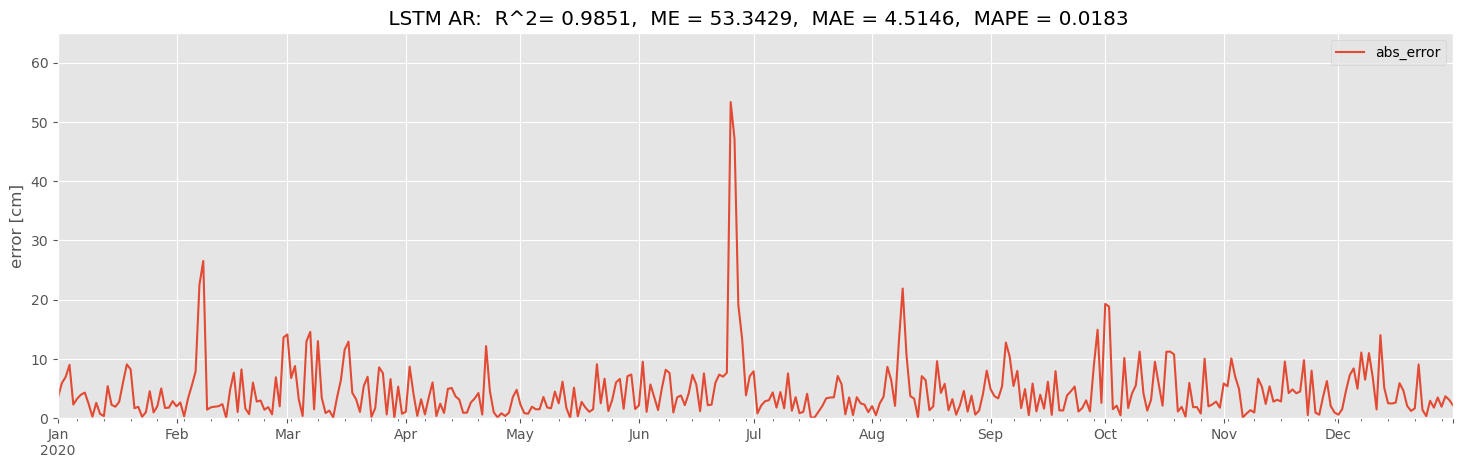

In [130]:
plot_result_error(model_name,y_test,y_pred)

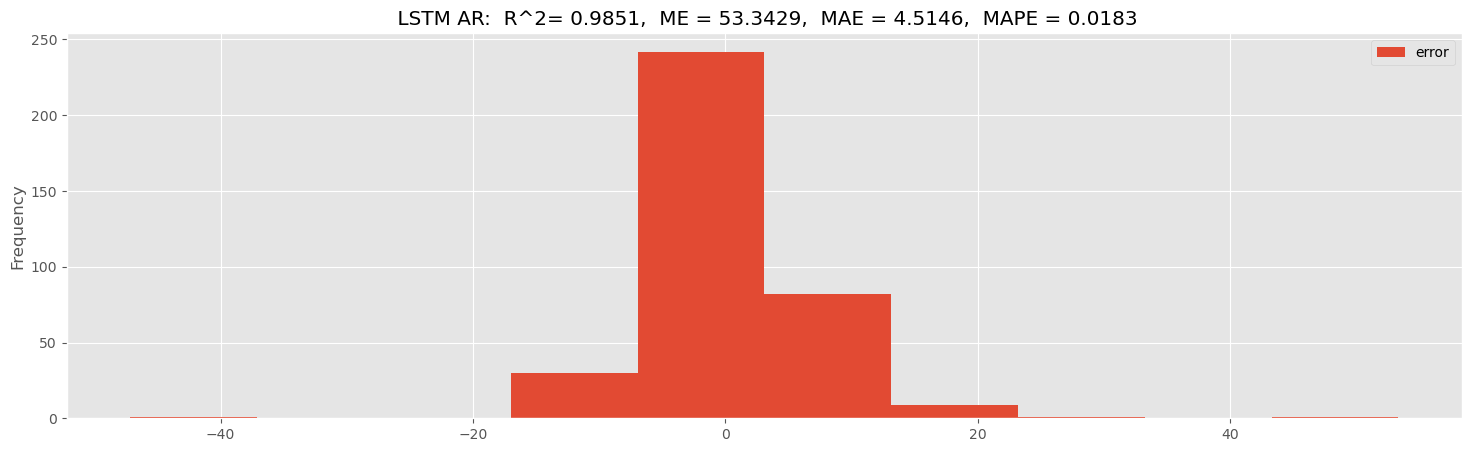

In [131]:
plot_result_error_hist(model_name,y_test,y_pred)

## CONV-1D - Only AR (autoregressive) model with y variable

In [162]:
input_layer = Input(shape=(7,1), dtype='float32')
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)
conv1D_layer = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer)
flatten_layer = Flatten()(avgpooling_layer)
dropout_layer = Dropout(0.2)(flatten_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [163]:
conv1d = Model(inputs=input_layer, outputs=output_layer)
conv1d.compile(loss='mean_absolute_error', optimizer='adam')
conv1d.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 7, 1)]            0         
                                                                 
 zero_padding1d_2 (ZeroPaddi  (None, 9, 1)             0         
 ng1D)                                                           
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 64)             256       
                                                                 
 average_pooling1d_2 (Averag  (None, 5, 64)            0         
 ePooling1D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 320)               0         
                                                                 
 dropout_11 (Dropout)        (None, 320)               0  

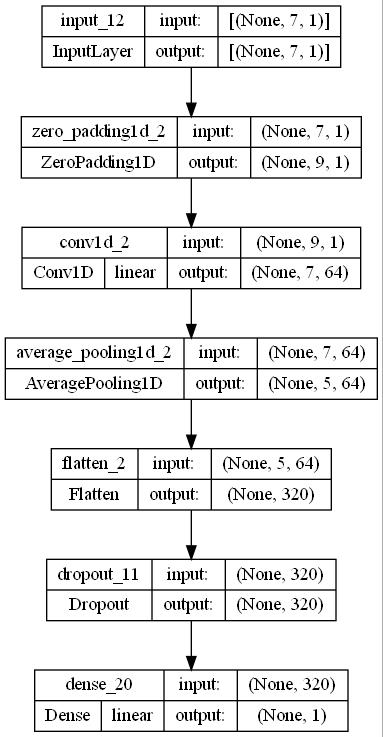

In [216]:
dot_img_file = model_name + '_DL_model.jpg'
tf.keras.utils.plot_model(conv1d, to_file=dot_img_file, show_shapes=True,show_layer_activations=True,)

In [90]:
save_weights_at = os.path.join('keras_models', 'Belgrade_WaterLevel_CONV-1D_weights_AR.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
conv1d.fit(x=Xar_train_s, y=y_train_s, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(Xar_test_s, y_test_s),
             shuffle=True)

Epoch 1/20
457/457 [==============================] - 39s 85ms/step - loss: 0.0435 - val_loss: 0.0522
Epoch 2/20
457/457 [==============================] - 40s 87ms/step - loss: 0.0278 - val_loss: 0.0416
Epoch 3/20
457/457 [==============================] - 38s 83ms/step - loss: 0.0242 - val_loss: 0.0376
Epoch 4/20
457/457 [==============================] - 42s 92ms/step - loss: 0.0219 - val_loss: 0.0359
Epoch 5/20
457/457 [==============================] - 42s 92ms/step - loss: 0.0199 - val_loss: 0.0367
Epoch 6/20
457/457 [==============================] - 41s 89ms/step - loss: 0.0185 - val_loss: 0.0309
Epoch 7/20
457/457 [==============================] - 41s 90ms/step - loss: 0.0173 - val_loss: 0.0289
Epoch 8/20
457/457 [==============================] - 40s 88ms/step - loss: 0.0162 - val_loss: 0.0297
Epoch 9/20
457/457 [==============================] - 42s 91ms/step - loss: 0.0157 - val_loss: 0.0265
Epoch 10/20
457/457 [==============================] - 42s 92ms/step - loss: 0.015

In [186]:
best_model = load_model(os.path.join('keras_models', 'Belgrade_WaterLevel_CONV-1D_weights_AR.20-0.0227.hdf5'))
y_pred_s = best_model.predict(Xar_test_s)

12/12 [==============================] - 0s 968us/step


In [215]:
y_pred = scaler_s.inverse_transform(y_pred_s)
y_pred = y_pred.reshape(-1)
model_name = 'CONV-1D AR'
print_model_results(model_name,y_test,y_pred)

CONV-1D AR:  R^2= 0.9863,  ME = 54.5163,  MAE = 4.5347,  MAPE = 0.0186


In [188]:
conv1d_AR_error = y_test - y_pred
conv1d_AR_metrics = list(model_error_metrics(y_test,y_pred))
conv1d_AR_metrics

[0.9772839327811924,
 59.232818603515625,
 5.810793141849706,
 0.023451226085408384]

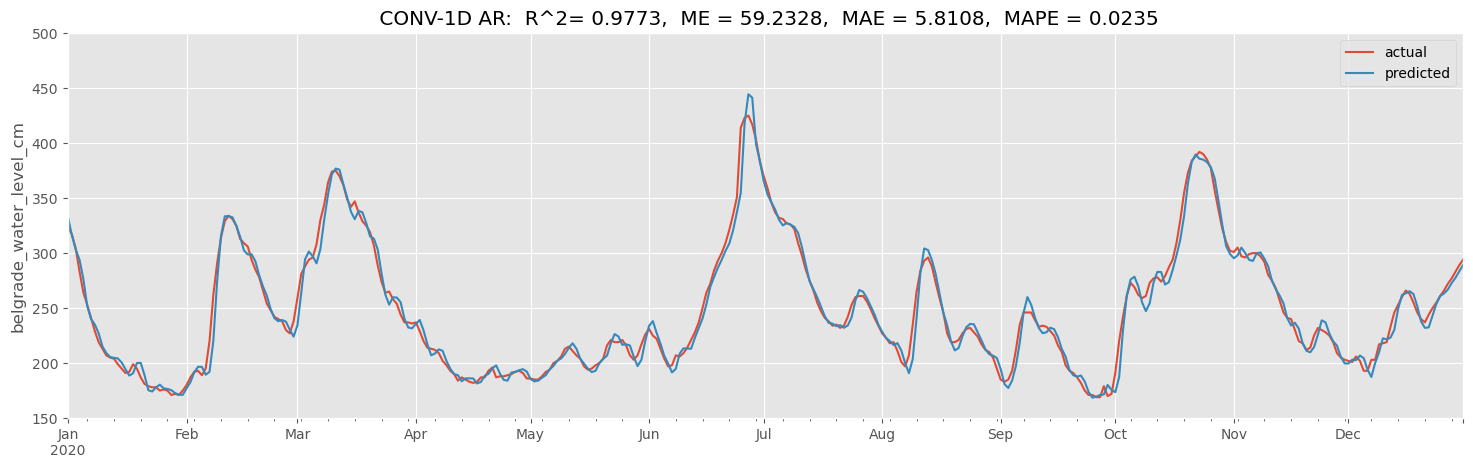

In [137]:
plot_results(model_name,y_test,y_pred)

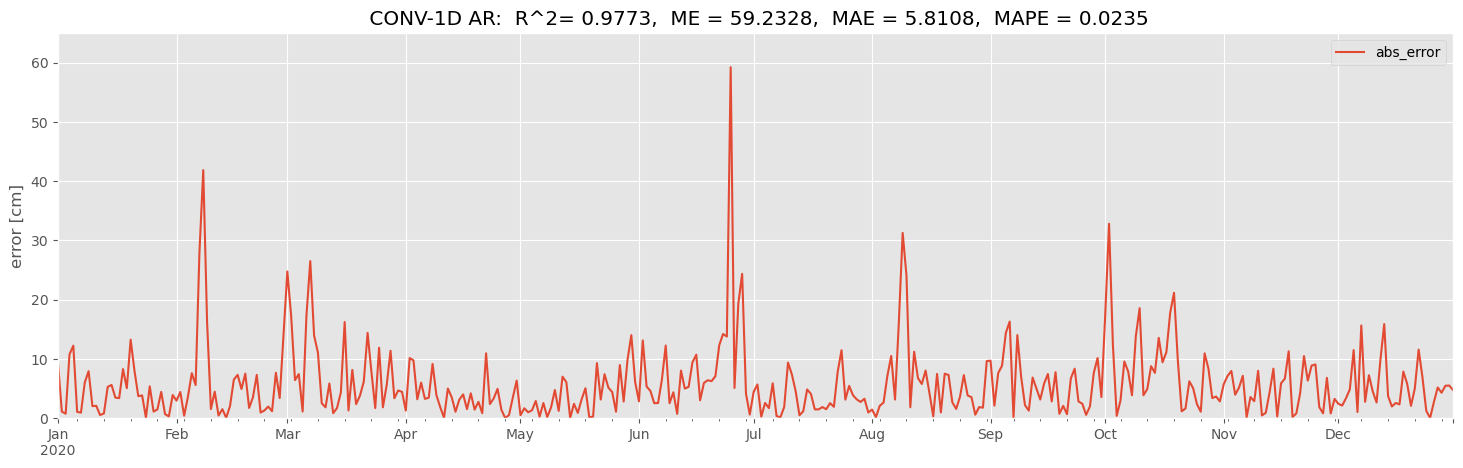

In [138]:
plot_result_error(model_name,y_test,y_pred)

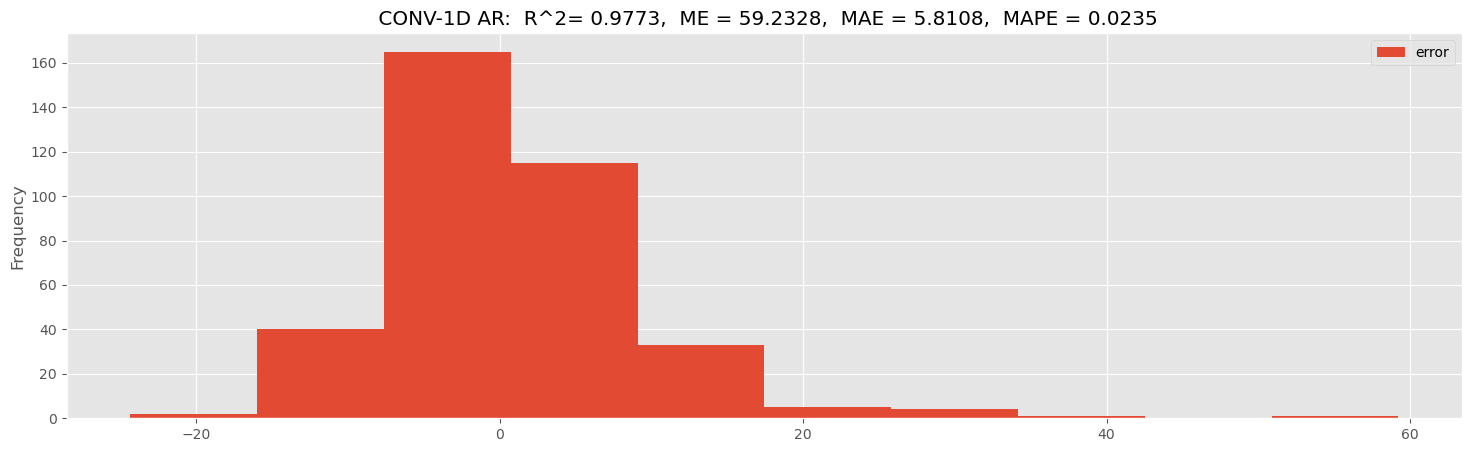

In [139]:
plot_result_error_hist(model_name,y_test,y_pred)

## Sumary Results Metrics

In [199]:
results_summary = pd.DataFrame({'Autoregressive': regr_AR_metrics, 'XGBoost': regr_XGB_AR_metrics, 'MLP': mlp_AR_metrics, 
                                'GRU': gru_AR_metrics, 'LSTM': lstm_AR_metrics, 'CONV-1D': conv1d_AR_metrics,},index=['R2','ME','MAE','MAPE'])

round(results_summary,3).T.sort_values(by='ME')

,R2,ME,MAE,MAPE
Autoregressive,0.987,51.096,4.419,0.018
LSTM,0.985,53.343,4.515,0.018
MLP,0.986,54.516,4.535,0.019
XGBoost,0.985,56.201,5.007,0.020
CONV-1D,0.977,59.233,5.811,0.023
GRU,0.983,62.117,4.590,0.018


## Error Descriptive Statistics

In [200]:
error_summary = pd.DataFrame({'Autoregressive': regr_AR_error, 'XGBoost': regr_XGB_AR_error, 'MLP': mlp_AR_error, 
                                'GRU': gru_AR_error, 'LSTM': lstm_AR_error, 'CONV-1D': conv1d_AR_error})
np.round(np.abs(error_summary).describe().T.drop(columns='count'),3).sort_values(
    by='75%')

,mean,std,min,25%,50%,75%,max
Autoregressive,4.419,4.787,0.040,1.544,3.253,5.568,51.096
LSTM,4.515,5.198,0.022,1.498,3.172,5.986,53.343
GRU,4.590,5.718,0.002,1.310,3.297,6.030,62.117
MLP,4.535,4.800,0.003,1.520,3.171,6.216,54.516
XGBoost,5.007,4.894,0.005,1.807,3.825,6.935,56.201
CONV-1D,5.811,6.205,0.004,1.858,4.236,7.608,59.233


# References

- Practical Time Series Analysis: https://www.packtpub.com/product/practical-time-series-analysis/9781788290227

- Time Series Analysis with Python Cookbook: https://www.packtpub.com/product/time-series-analysis-with-python-cookbook/9781801075541